# Obesity Trends:

Obesity is a worldwide problem which causes a lot of serious medical problems. Obesity will be increased, about 45% out of the whole population by 2035. The proportion of morbid obese and the actual costs on healthcare will be increased. Implementation of a system that could estimate the percentage of obese population for particular time duration given the age range, income range, location, high confidence level and low confidence level of obesity, education, gender, the class level, etc. of the population can help in fight against obesity.



Build a machine learning model to estimate the percentage of obese population.



Dataset Link: https://www.kaggle.com/spittman1248/cdc-data-nutrition-physical-activity-obesity

## Problem Statement:

Obesity is a significant global health concern, associated with various serious medical conditions. As you rightly pointed out, the prevalence of obesity is expected to rise, affecting approximately 45% of the global population by 2035. The impact of obesity extends beyond individual health, as it also contributes to increased healthcare costs.

To address this challenge, we can build a machine learning model that estimates the percentage of the obese population based on various factors such as age, income, location, education, and gender. Let’s explore some approaches:



## Import Libraries:

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## Load the Data:

In [57]:
data = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [58]:
data.shape

(53392, 33)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [60]:
data.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,53392.000000,53392.000000,0.0,48346.000000,48346.000000,48346.000000,48346.000000,48346.00000,53392.000000
mean,2013.281465,2013.281465,NaN,31.156681,31.156681,26.892227,35.989997,3889.19286,30.282215
std,1.693300,1.693300,NaN,10.247033,10.247033,10.038584,11.205813,19829.42129,16.821318
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.00000,1.000000
25%,2012.000000,2012.000000,NaN,24.100000,24.100000,20.000000,28.200000,566.00000,17.000000
50%,2013.000000,2013.000000,NaN,30.700000,30.700000,26.450000,35.600000,1209.00000,30.000000
75%,2015.000000,2015.000000,NaN,37.000000,37.000000,32.900000,42.200000,2519.00000,44.000000
max,2016.000000,2016.000000,NaN,77.600000,77.600000,69.500000,87.700000,476876.00000,78.000000


In [61]:
data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

## Step 2.  Data Cleaning & Data Preprocessing & Data Visualization:

In [62]:
# Check the missing value

data.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

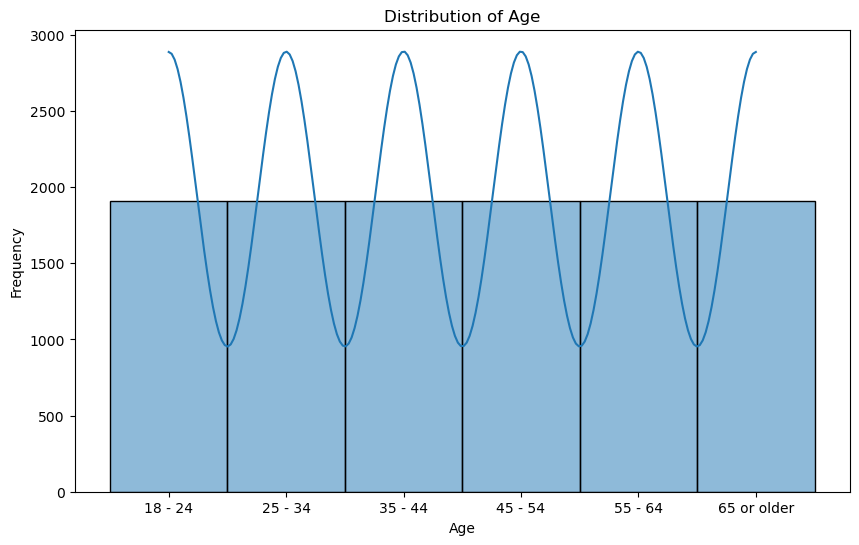

In [63]:
# Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age(years)'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

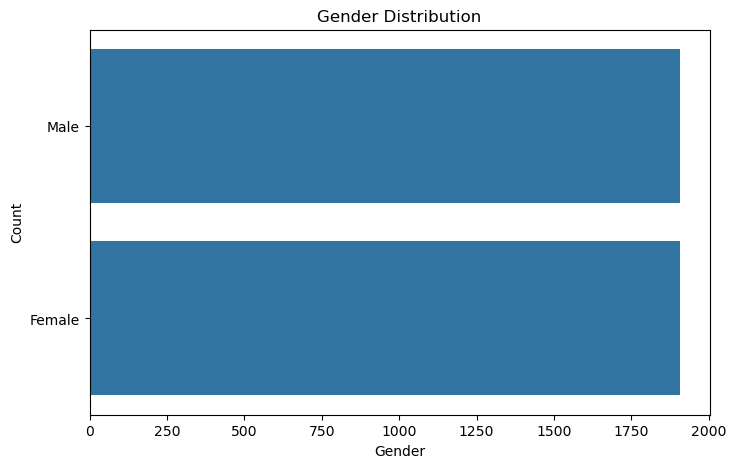

In [64]:
# Bar Plot of Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data['Gender'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

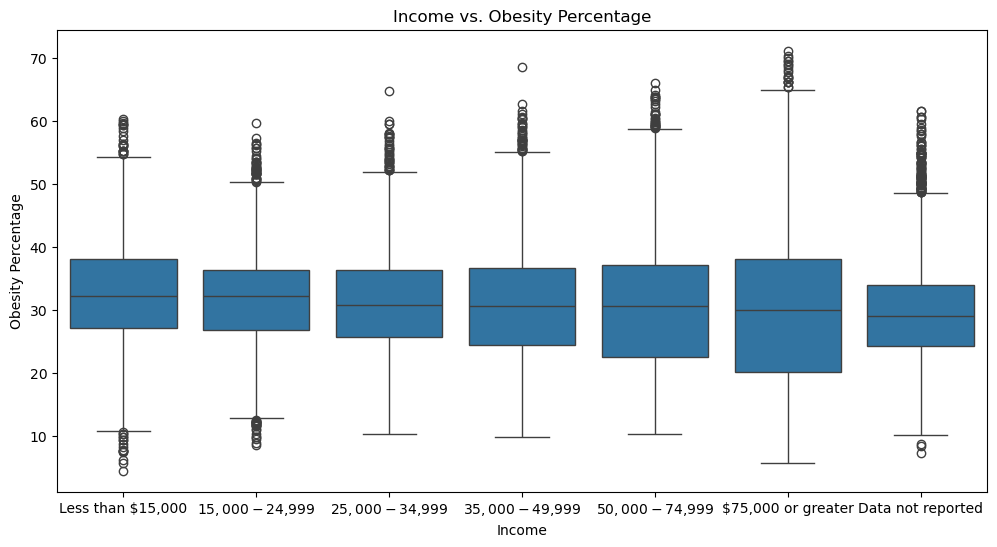

In [65]:
# Box Plot of Income vs. Obesity Percentage

plt.figure(figsize=(12, 6))
sns.boxplot(x='Income', y='Data_Value', data=data)
plt.title('Income vs. Obesity Percentage')
plt.xlabel('Income')
plt.ylabel('Obesity Percentage')
plt.show()

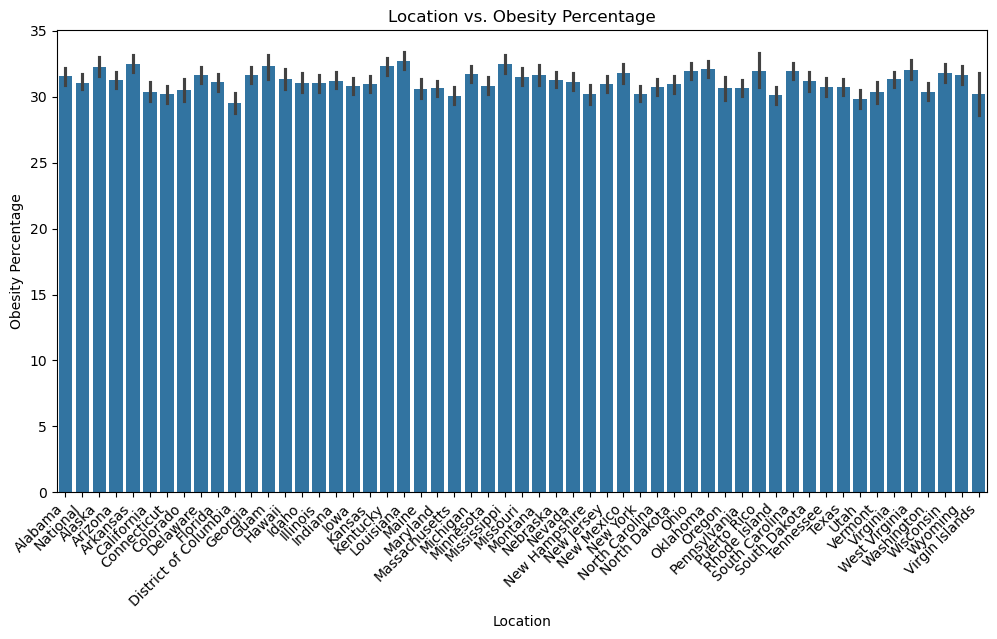

In [66]:
# Bar Plot of Location vs. Obesity Percentage

plt.figure(figsize=(12, 6))
sns.barplot(x='LocationDesc', y='Data_Value', data=data)
plt.title('Location vs. Obesity Percentage')
plt.xlabel('Location')
plt.ylabel('Obesity Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

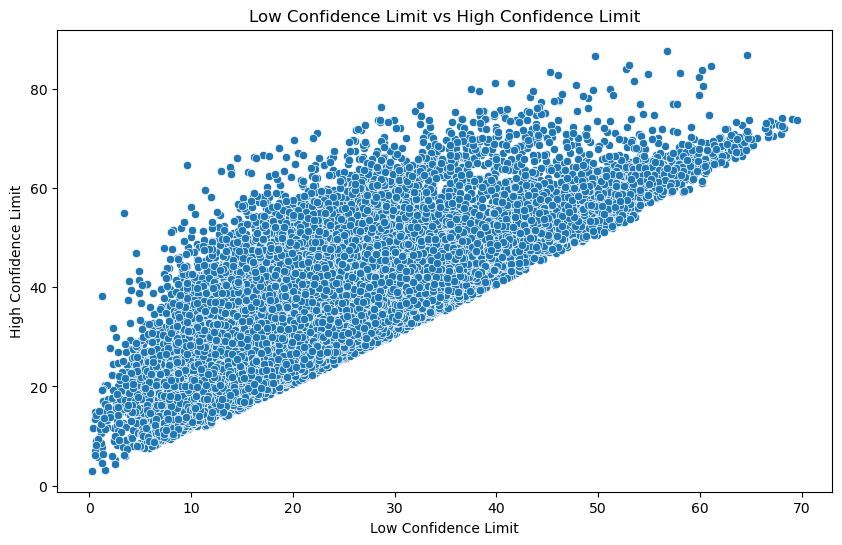

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Low_Confidence_Limit', y='High_Confidence_Limit ', data=data)
plt.title('Low Confidence Limit vs High Confidence Limit')
plt.xlabel('Low Confidence Limit')
plt.ylabel('High Confidence Limit')
plt.show()

In [68]:
print(data["DataValueTypeID"].nunique())
print(data["DataValueTypeID"].unique())

1
['VALUE']


In [69]:
print(data["Datasource"].nunique())
print(data["Datasource"].unique())

1
['Behavioral Risk Factor Surveillance System']


In [70]:
data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [71]:
# Drop unnecessary columns

cols = ['LocationAbbr', 'LocationDesc', 'Datasource', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Footnote_Symbol',
        'Data_Value_Footnote', 'Race/Ethnicity', 'GeoLocation', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
        'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'StratificationCategoryId1', 'StratificationID1']

In [72]:
data = data.drop(columns = cols)
data.shape

(53392, 13)

## Step 3: Feature Selection/Engineering:

In [73]:
data.head()

,YearStart,YearEnd,Class,Topic,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID,StratificationCategory1,Stratification1
0,2011,2011,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,32.0,30.5,33.5,7304.0,1,Total,Total
1,2011,2011,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,32.3,29.9,34.7,2581.0,1,Gender,Male
2,2011,2011,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,31.8,30.0,33.6,4723.0,1,Gender,Female
3,2011,2011,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,33.6,29.9,37.6,1153.0,1,Education,Less than high school
4,2011,2011,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,32.8,30.2,35.6,2402.0,1,Education,High school graduate


In [74]:
# Separate features (X) and target variable (y)

X = data.drop('Data_Value', axis=1)
y = data['Data_Value']

In [75]:
data.isnull().sum()

YearStart                     0
YearEnd                       0
Class                         0
Topic                         0
Question                      0
Data_Value                 5046
Data_Value_Alt             5046
Low_Confidence_Limit       5046
High_Confidence_Limit      5046
Sample_Size                5046
LocationID                    0
StratificationCategory1       0
Stratification1               0
dtype: int64

In [76]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (42713, 12)
Shape of X_test: (10679, 12)
Shape of y_train: (42713,)
Shape of y_test: (10679,)


In [78]:
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding on categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [79]:
# Display the shape of the encoded training and testing sets

print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)


Shape of X_train_encoded: (42713, 56)
Shape of X_test_encoded: (10679, 56)


In [80]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with a strategy (e.g., mean, median, mod
imputer = SimpleImputer(strategy='mean')

In [81]:
# Fit the imputer to the training data and transform the training data
X_train_imputed = imputer.fit_transform(X_train_encoded)

# Transform the testing data using the fitted imputer
X_test_imputed = imputer.transform(X_test_encoded)

In [82]:
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

In [83]:
X_train_imputed

array([[2011. , 2011. ,   36.7, ...,    0. ,    0. ,    0. ],
       [2015. , 2015. ,   51.9, ...,    0. ,    0. ,    0. ],
       [2013. , 2013. ,   21.5, ...,    0. ,    0. ,    0. ],
       ...,
       [2015. , 2015. ,   47. , ...,    0. ,    0. ,    0. ],
       [2011. , 2011. ,   39.5, ...,    0. ,    0. ,    0. ],
       [2011. , 2011. ,   24.4, ...,    0. ,    0. ,    0. ]])

In [84]:
X_test_imputed

array([[2015. , 2015. ,   25.9, ...,    0. ,    0. ,    0. ],
       [2011. , 2011. ,   19.4, ...,    0. ,    0. ,    0. ],
       [2013. , 2013. ,   22.5, ...,    0. ,    0. ,    0. ],
       ...,
       [2016. , 2016. ,   41.1, ...,    0. ,    0. ,    0. ],
       [2015. , 2015. ,   52.9, ...,    0. ,    0. ,    0. ],
       [2012. , 2012. ,   29. , ...,    0. ,    0. ,    0. ]])

In [85]:
y_train_imputed

array([36.7, 51.9, 21.5, ..., 47. , 39.5, 24.4])

In [86]:
y_test_imputed 

array([25.9, 19.4, 22.5, ..., 41.1, 52.9, 29. ])

## Step 4: Model Selection

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model

RandomForestRegressor(random_state=42)

In [88]:
# Fit the model to the imputed training data
rf_model.fit(X_train_imputed, y_train_imputed)

RandomForestRegressor(random_state=42)

## Step 6: Model Evaluation


In [89]:
# Evaluate the model's performance on the test data

y_pred = rf_model.predict(X_test_imputed)
y_pred

array([25.9, 19.4, 22.5, ..., 41.1, 52.9, 29. ])

In [90]:
# Calculate Mean Squared Error (MSE) and R-squared (R2) score

from sklearn.metrics import mean_squared_error, r2_score

In [91]:
mse = mean_squared_error(y_test_imputed, y_pred)
mse

1.2870118924996682e-05

In [92]:
r2 = r2_score(y_test_imputed, y_pred)
r2

0.9999998654806553

In [93]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1.2870118924996682e-05
R-squared (R2) Score: 0.9999998654806553


## Observation:

- It seems like the model's performance on the test data is excellent.
- The Mean Squared Error (MSE) is very low, indicating that the model's predictions are very close to the true values.
- Additionally, the R-squared (R2) score is very close to 1, suggesting that the model explains the variability in the target variable extremely well.